# Credit Card Fraud

## Importing dataset

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Codsoft\Credit_Card_Fraud\fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data preprocessing and feature engineering

In [4]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df["dob"] = pd.to_datetime(df["dob"])
today = pd.Timestamp('today')
df['age'] = today.year - df['dob'].dt.year
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,36
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,46
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,62
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,57
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,38


In [6]:
df.drop(columns=['Unnamed: 0','trans_num','merch_lat','merch_long','trans_date_trans_time','dob'],inplace=True)
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,is_fraud,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,0,36
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,0,46
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,0,62
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,0,57
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,0,38


In [9]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [11]:
legit = df[df['is_fraud'] == 0]

In [12]:
fraud = df[df['is_fraud'] == 1]

In [13]:
normal_sample = legit.sample(n=7506)

In [14]:
data = pd.concat([normal_sample,fraud], axis = 0)

In [15]:
data.shape

(15012, 18)

In [16]:
cat_var = ['merchant','category','first','last','gender','street','city','state','zip','job']

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_var:
  data[f'{col}'] = encoder.fit_transform(data[f'{col}'])

In [20]:
data.drop(columns=['cc_num','merchant','street','state','first','last','long','lat','job','unix_time','city_pop'],inplace=True)
data.head()

,category,amt,gender,city,zip,is_fraud,age
74174,5,75.50,1,487,394,0,45
601534,12,4.58,0,81,622,0,34
440727,2,55.69,0,171,955,0,40
1183168,11,138.93,0,290,502,0,39
808416,5,48.89,0,295,311,0,76


In [21]:
X = data.drop(['is_fraud'],axis = 1)
Y = data['is_fraud']

## Spliting dataset into train and test dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

## Model Selection and Evaluation

In [26]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
print(model1.score(X_test,Y_test))
print(model1.score(X_train,Y_train))

0.8508158508158508
0.8528603547339495


In [28]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
print(model2.score(X_test,Y_test))
print(model2.score(X_train,Y_train))

0.9487179487179487
1.0


In [30]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=20)
model3.fit(X_train,Y_train)
print(model3.score(X_train,Y_train))
print(model3.score(X_test,Y_test))

0.9986676659172288
0.9600399600399601


### RandomForest come out to give best accuracy out of all above so we will use model3

## Confusion_Matrix and Classification_Report

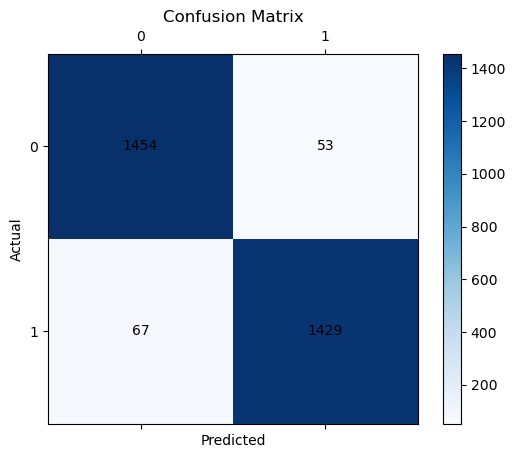

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
Y_pred = model3.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
for (i, j), value in np.ndenumerate(cm):
    ax.text(j, i, f'{value}', ha='center', va='center')
plt.show()


In [43]:
from sklearn.metrics import classification_report
cr = classification_report(Y_test,Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1507
           1       0.96      0.96      0.96      1496

    accuracy                           0.96      3003
   macro avg       0.96      0.96      0.96      3003
weighted avg       0.96      0.96      0.96      3003

